## ChemEPy cookbook

Welcome to the chemEPy cookbook an interactive Jupyter notebook enviorment designed to teach a python toolchain for chemical engineering. As of now the modules we are going to work on are the IAPWS module for the properties of water/steam, thermo and the chemEPy module currently under developement in this github repo. The way we are currently building this is going to be closely modeled on the scipy module. The current version is built on top of a variety of modules that are common in python scientific computing to see the dependencies please go to requirments.txt. In order to cut down on load times, and keep the module lightweight those modules that do not require reading in tables will load on initialization, but those that do require tables will need to be loaded seperately the same way you load in the optimization or linalg packages in scipy.

In [1]:
import chemEPy
from chemEPy import eos
from chemEPy import equations

In [32]:
#ignore this cell. I am using it to reload the package after I rebuild it when I modify it
from importlib import reload
reload(chemEPy)
reload(chemEPy.eos)
reload(chemEPy.equations)

<module 'chemEPy.equations' from 'C:\\Users\\Jacob\\Documents\\personal\\modules\\chemEPy\\chemEPy\\equations.py'>

As of now there are two available equations of state, ideal gas and van Der Waals. These functions are typical of the design thus far. They are supposed to be generalizable and intuitive, but do not rely on any computer algebra. As of now there is no use of sympy in the module and for the foreseeable future we would like to keep it this way. This means that you the user have one important job, make sure your units line up correctly. The lack of computer algebra greatly simpifies this process and it most cases this means that the only return from a function will be a float or collection of floats. In exchange for careful attention to units we are going to try and make this module easy to use, and as flexible as possible. Let us begin by looking at some of the info functions.

In [3]:
eos.idealGasInfo()
eos.vdwInfo()

solves for any of 4 unknowns P,V,n,T units are agnostic
a = bar*L^2/mol^2 and b = L/mol, std R is 0.08314 L*Bar*K^-1*mol^-1


These equations are built using the python patern kwargs which means that you are going to be able to put your arguments in any order that you like, but remember the units are on you. Let us examine how the syntax for these functions work

In [4]:
eos.idealGas(P = 1, R = 0.08205, n = 1, T = 273)

22.39965

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import math

Text(0.5, 0.98, 'Ideal gas plots')

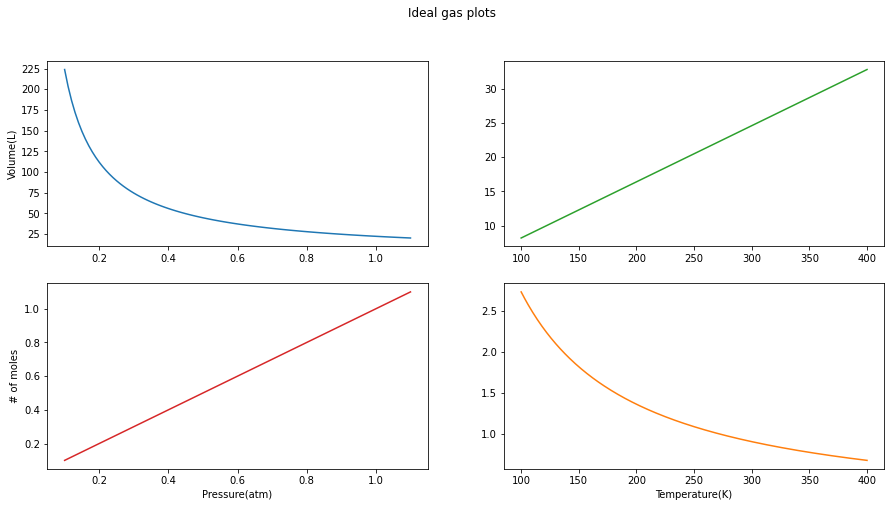

In [6]:
Parrow = np.linspace(0.1,1.1,101)
volData1 = eos.idealGas(P = Parrow, R = 0.08205, n = 1, T = 273)
nData1 = eos.idealGas(P = Parrow, R = 0.08205, T = 273, V = 22.4)

Tarrow = np.linspace(100,400,301)
volData2 = eos.idealGas(P = 1, R = 0.08205, n = 1, T = Tarrow)
nData2 = eos.idealGas(P = 1, R = 0.08205, T = Tarrow, V = 22.4)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,7.5))
ax1.plot(Parrow, volData1)
ax1.set(ylabel = 'Volume(L)')
ax2.plot(Tarrow, volData2, 'tab:green')
ax3.plot(Parrow, nData1, 'tab:red')
ax3.set(xlabel = 'Pressure(atm)', ylabel = '# of moles')
ax4.plot(Tarrow, nData2, 'tab:orange')
ax4.set(xlabel = 'Temperature(K)')
fig.suptitle('Ideal gas plots')

Let us dig into our example above a little bit. As you can see there are several intuitive things about the way the ideal gas law works. You begin by stating your arguements in the function explictly, this means you do not need to worry about the order you put them in. It also means that the function is going to figure out which of your arguments are missing and then return the correct one. You can also feed the function vectors in the form of a numpy array which is what we did to build these graphs. 

Now we will move on to the Van der Waals eos. If you scroll up you can see that this equation of state does specify units because the correction terms a and b have units. First let us see which materials are available to this function.

In [7]:
eos.vdwNames()

Aluminum trichloride
Ammonia
Ammonium chloride
Argon
Boron trichloride
Boron trifluoride
Diborane
Bromine
Perchloryl fluoride
Chlorine pentafluoride
Phosphonium chloride
Chlorine
Trichlorofluorosilane
Fluorine
Germanium tetrachloride
Nitrogen trifluoride
Phosphorus trifluoride
Tetrafluorohydrazine
Germane
Helium
Hydrogen bromide
Hydrogen chloride
Hydrogen cyanide
Hydrogen fluoride
Hydrogen iodide
Hydrogen
Water
Hydrogen sulphide
Hydrogen selenide
Krypton
Silane
Silicon tetrachloride
Silicon tetrafluoride
Titanium(IV) chloride
Mercury
Nitric oxide
Nitrogen dioxide
Nitrogen
Nitrous oxide
Hydrazine
Neon
Oxygen
Ozone
Phosphorus
Phosphine
Radon
Stannic chloride
Sulphur
Sulphur dioxide
Sulphur hexafluoride
Selenium
Uranium(VI) fluoride
Tungsten(VI) fluoride
Xenon
Xenon difluoride
Xenon  tetrafluoride
Chlorotrifluoromethane
Trichlorofluoromethane
Tetrachloromethane
Tetrafluoromethane
Carbon monoxide
Carbon oxysulphide
Carbon dioxide
Carbon disulphide
Trichloromethane
Trifluoromethane
Dichloro

Quite a nice variety! As of the time of writing this the goal will be to have materials use a common capitialization format, but when in doubt see if there is a helper function to make your life easier. In the info function we can also see that the gas constant R is given in the correct units.

In [8]:
temp1 = eos.vdw(name = 'Naphthalene', V = 20, P = 5, n = 1, R = 0.08314)
temp2 = eos.idealGas(V = 20, P = 5, n = 1, R = 0.08314)
v1 = eos.vdw(name = 'Naphthalene', T = 1200, P = 5, n = 1, R = 0.08314)
v2 = eos.idealGas(T = 1200, P = 5, n = 1, R = 0.08314)
print('temperature with Van der Waals eos is:', temp1, 'K')
print('volume with Van der Waals eos is:', v1, 'L \n')
print('temperature with ideal gas eos is:', temp2, 'K')
print('volume with ideal gas eos is:', v2, 'L')

temperature with Van der Waals eos is: 1671.5531392831367 K
volume with Van der Waals eos is: 19.741084727539914 L 

temperature with ideal gas eos is: 1202.7904738994466 K
volume with ideal gas eos is: 19.9536 L


As of now the Van der Waals solver for V and n uses a solver for a non-linear system, Newton's method, with an initial guess supplied by the ideal gas equation. A convergence study is planned for this, but it means that convergence is not guarenteed.

Now we will look at a sub-module that loaded on initialization, fluidNumbers, which provides functions for a variety of numbers in fluid dynamics, most of them are dimensionless parameters.

In [9]:
chemEPy.fluidNumbers.reynoldsInfo()
chemEPy.fluidNumbers.rayleighInfo()

arguments are rho, u, L, mu OR u, L, nu
arguments are Gr, Pr OR g, beta, Ts, Tinf, L, nu, alpha


Again these functions are designed to parse the information you give them and then determine if they are a valid set of arguements so oftentimes there are multiple combinations of arguments you can feed these.

In [10]:
print(chemEPy.fluidNumbers.reynolds(rho = 1, u = 2, L = 0.1, mu = 1e-2))
print(chemEPy.fluidNumbers.reynolds(u = 2, L = 0.1, nu = 1e-2))

20.0
20.0


In [11]:
print(chemEPy.fluidNumbers.rayleigh(g = 9.81, beta = 1/273, Ts = 295, Tinf = 273, L = 1, nu = 1.5e-5, alpha = \
                                   chemEPy.fluidNumbers.thermalDiffusivity(k = 0.025, rho = 1.2, cp = 1000)))

2529758241.758241


Available functions for the fluidNumbers module are currently: archimedes, biot, graetz, grashoff, nusselt, peclet, prandtl, rayleigh, reynolds, and thermalDiffusivity

Now we will explore the nusseltCor submodule which is designed to work through the nusselt number correlations for convective heat transfer

In [12]:
chemEPy.nusseltCor.nuInfo()

argument combos are: 
    forced = True, shape = flatPlate, Re, Pr 
    forced = True, shape = sphere, general = True, Re, Pr, muS, muInf 
    forced = True, shape = sphere, general = False, Re, Pr 
    forced = True, shape = crossCylinder, Re, Pr 
    forced = True, shape = tube, general = True, uniform = Ts, Gz, Re 
    forced = True, shape = tube, general = False, uniform = Ts, Gz, Re 
    forced = True, shape = tube, general = False, uniform = q, Gz, Re, muB, muW 
    forced = True, shape = tube, general = False, Gz, Re, Pr, heating = T/F 
    forced = False, shape = verticalPlate, Ra 
    forced = False, shape = horizontalPlate, Ra 
    forced = False, shape = cylinder, Ra, Pr 
    forced = False, shape = sphere, Ra, Pr


Wow thats a lot of possible arguments! But each line guides you through what you will need to gather before you proceed. This submodule combined with the fluidNumbers makes for a powerful quick workflow that can speed you through the process. Let's take a look at an example where we find the convective heat transfer for free convection from a cylinder.

In [13]:
ra = chemEPy.fluidNumbers.rayleigh(g = 9.81, beta = 1/273, Ts = 323, Tinf = 273, L = 0.1, nu = 1.5e-5, alpha = \
                                   chemEPy.fluidNumbers.thermalDiffusivity(k = 0.025, rho = 1.2, cp = 1000))
#recall that L is the characteristic length, which in this case is the diameter of the cylinder
pr = 0.71 #physical constant lookup
area = math.pi*0.1*2 #this cylinder has a diameter of 0.1 and length 2
ts = 323
tinf = 273
h = chemEPy.nusseltCor.nu(forced = False, shape = 'cylinder', Ra = ra, Pr = pr) * 0.025/0.1
q = h*area*(ts-tinf)
print('The total convective heat transfer is:', q, 'watts')

The total convective heat transfer is: 188.58624137979706 watts


Now we will look at two modules which are designed to help with physical properties. First iapws which is particulary useful for the properties of water/steam and has some additional features such as heavy water and ammonia. Second thermo which is useful for a broader variety of materials but has a different design philosphy and uses a significant amount of computer algebra. Both packages are on PyPI and have good documentation which can be found at https://pypi.org/project/iapws/ and https://pypi.org/project/thermo/

In [14]:
import iapws
import thermo

In [15]:
from iapws import IAPWS97 as ia

In [16]:
water = ia(T = 170+273.15, x = 0.5) #saturated water at 170 C with quality = 0.5
print(water.Liquid.cp, water.Vapor.cp) #heat capacities
print(water.Liquid.v, water.Vapor.v, water.v) #specific volumes
print(water.Liquid.f, water.Vapor.f) #fugacity should be equal for VLE

4.369498593233083 2.5985140134188485
0.0011142624283287058 0.24261579551606938 0.12186502897219904
0.31951664114714096 0.3195068052820659


The iapws module is designed more along the lines of the fluidNumbers submodule we looked at above. It does not take in positional arguments and instead lets the user specify a combination of arguments which it then autochecks to make sure that the system is appriopiatly specified. In the two phase region you will be able to specify one free physical parameter and the quality of the water/steam and in the one phase region you will be able to specify two parameters.

In [17]:
water = ia(T = 170+273.15, P = 1) #pressure is in MPa so this is slightly less than 10 atm
water.v, water.rho, water.mu

(0.0011140994178040846, 897.5859640704442, 0.00015982777631349298)

There are other submodules in the iapws package that you can explore and there are additional parameters included in the IAPWS97 data for a full list please see: https://iapws.readthedocs.io/en/latest/iapws.iapws97.html#iapws.iapws97.IAPWS97

Now we will look at some of the functionality in the thermo module. Thermo is large and impressive module with dozens of submodules some of which overlap with the functionality of chemEPy. If you are interested in some of these other submodules you should look further into them, but they are different from chemEPy. First the functions in thermo are primarily written with positional arguments so they are not going to try and parse out the missing arguement and solve for it. This means that some of the functions are more specific and less flexible. That said thermo has a fanstic library that can speed up physical property calculation called chemical. For detailed information on all the functionality please see: https://thermo.readthedocs.io/thermo.chemical.html

In [18]:
from thermo.chemical import Chemical

In [19]:
ip = Chemical('isopentane') #all chemicals are loaded by default to 298.15 K and 101325 Pa
print(ip.Tm, ip.Tb, ip.rho, ip.Cp, ip.mu) #melting, boiling, density, cp, and dynamic viscosity at current state
ip.calculate(T = 373.15, P = 1e5) #change temperature and pressure
print(ip.phase, ip.alpha) #for pure components we can see the phase, and find thermal diffusivity

113.15 300.98 614.5117311555967 2180.291615397415 0.00021444468067026754
g 4.900754686915857e-06


In [20]:
ip.VaporPressure.solve_prop(1e5) #solve for a dependent properity

300.6425375813437

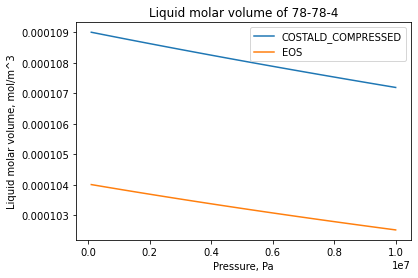

In [21]:
ip.VolumeLiquid.plot_isotherm(T = 250, Pmin = 1e5, Pmax = 1e7)

Now we will come back to the chemEPy module and look at the radiation and conduction submodules

In [22]:
chemEPy.radiation.qInfo()

arguments are body1(grey/black), body2(grey/black), area, t1, t2, epsilon1, epsilon2.
    Optional args are imperial(T/F) default is False 
    viewFactor default is 1 
    epsilon1 default is 1 (black body) 
    epsilon2 default is 1 
    area2 if doing 2 grey bodies default is area2 = area


The function q will return the total heat exchanged between two black or grey bodies. You can set the units to imperial if you desire and there are several optional arguements. The viewFactor arguement will be used to compute the composite view factor if both bodies are grey. Let us look at an example where we find the energy exchanged between two grey bodies of uneven areas with a known view factor.

In [23]:
chemEPy.radiation.q(body1 = 'grey', body2 = 'grey', area = 0.5, area2 = 0.3, t1 = 300, t2 = 500, epsilon1 = 0.9,\
                    epsilon2 = 0.8, viewFactor = 0.8)

-868.428

This result is negative because the function is expressing the energy going from body one to body 2. In the future adding functionality on how to compute different view factors will be included in the radiation submodule

In [36]:
equations.antoine(name = 'Water', P = 1)

-447.8434861329821